<a href="https://colab.research.google.com/github/Sjoerd-de-Witte/Machine-Learning-2023/blob/main/4_7_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!gdown -O /tmp/ml.py 174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
%run /tmp/ml.py

Downloading...
From: https://drive.google.com/uc?id=174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
To: /tmp/ml.py
100% 1.31k/1.31k [00:00<00:00, 6.18MB/s]


# Overfitting

When you fit a model to a dataset, you should always check to see if the model is not overfitting. Overfitting means that the model captures details that are specific to the training examples, rather than capturing a pattern that generalizes well to new data. There are several possible causes, e.g. a relatively small training set, high-dimensional input data, a not very representative training set, ...

In [25]:
from pipetorch import dam_outflow
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
df = dam_outflow()

# Fit a 7th order polynomial

- Sort the data by waterlevel. This will help you plot the data later on, it does not affect training.
- Split the dataset in a 20% train and 80% test split. Of course, this is stupid, but we will do this to make the model overfit more easily and then try to prevent that.
- Add degree=7 polynomials
- Scale the data
- fit a regression model
- scatter the data and plot the model over it

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


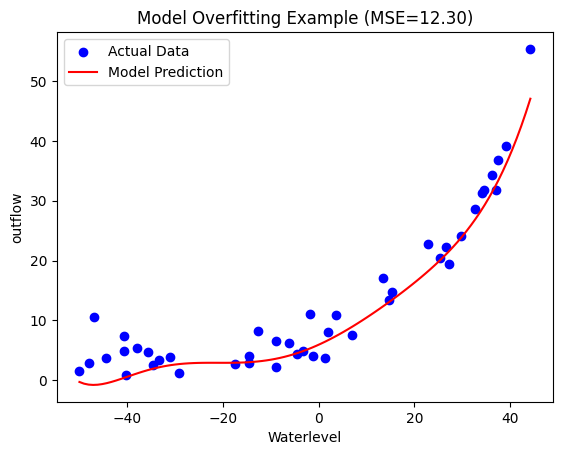

In [30]:
df.sort_values(by='waterlevel')


X = df[['waterlevel']]
y = df['outflow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

poly_features = PolynomialFeatures(degree=7)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

plt.scatter(X_test, y_test, label='Actual Data', color='blue')

x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
x_range_scaled = scaler.transform(x_range_poly)
y_pred_range = model.predict(x_range_scaled)
plt.plot(x_range, y_pred_range, label='Model Prediction', color='red')

plt.xlabel('Waterlevel')
plt.ylabel('outflow')
plt.legend()
plt.title(f'Model Overfitting Example (MSE={mse:.2f})')
plt.show()

One observation is that to overfit, the coefficients take on relatively big positive and negative values.

In [31]:
model.coef_

array([  0.        ,  11.46263183,  11.63510423,  -9.95566057,
       -13.32569198,  33.25206744,  15.94306018, -14.67847834])

# Regularization

To prevent overfitting, many algorithms support some form of regularization, by adding a penalty to the loss function on the parameters. In general, these penalties make parameter values close to zero more preferable. We have seen that fitting a 8th degree polynomial for the Dam Dataset is prone to overfitting, so we will show how regularization can help to solve that.

Ridge Regularization is controlled by a hyperparameter. Set this parameter to weak and there will still be some overfitting. Set this parameter too strong and it will underfit.

Repeat the same process, but now use a Ridge Regression model with alpha=0.01.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


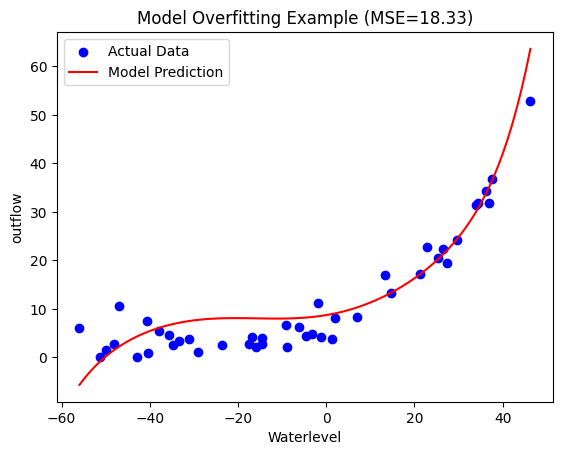

In [34]:
df.sort_values(by='waterlevel')

# Split the dataset into a 20% train and 80% test split
X = df[['waterlevel']]
y = df['outflow']  # Replace 'target_variable' with the name of your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

poly_features = PolynomialFeatures(degree=7)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

model = Ridge(alpha=0.01)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

plt.scatter(X_test, y_test, label='Actual Data', color='blue')

x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
x_range_scaled = scaler.transform(x_range_poly)
y_pred_range = model.predict(x_range_scaled)
plt.plot(x_range, y_pred_range, label='Model Prediction', color='red')

plt.xlabel('Waterlevel')
plt.ylabel('outflow')
plt.legend()
plt.title(f'Model Overfitting Example (MSE={mse:.2f})')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


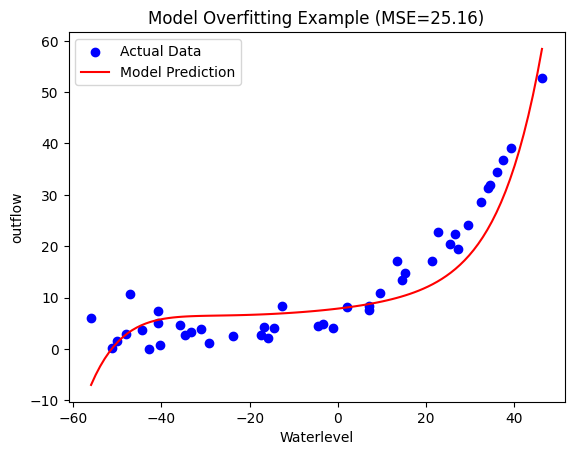

In [36]:
# Again with alpha=10
df.sort_values(by='waterlevel')

# Split the dataset into a 20% train and 80% test split
X = df[['waterlevel']]
y = df['outflow']  # Replace 'target_variable' with the name of your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

poly_features = PolynomialFeatures(degree=7)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

model = Ridge(alpha=10)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

plt.scatter(X_test, y_test, label='Actual Data', color='blue')

x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
x_range_scaled = scaler.transform(x_range_poly)
y_pred_range = model.predict(x_range_scaled)
plt.plot(x_range, y_pred_range, label='Model Prediction', color='red')

plt.xlabel('Waterlevel')
plt.ylabel('outflow')
plt.legend()
plt.title(f'Model Overfitting Example (MSE={mse:.2f})')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


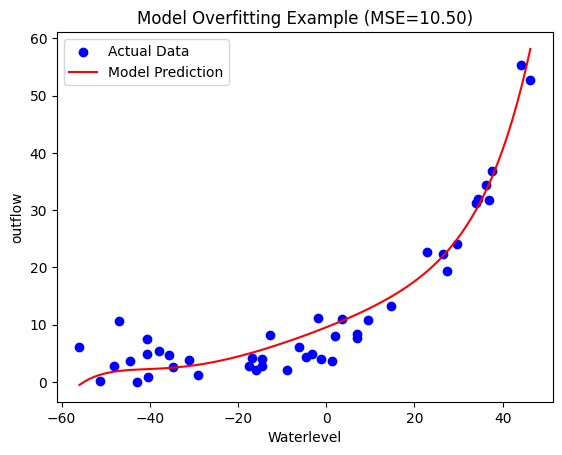

In [37]:
# Again with Alpha=0.1
# Again with alpha=10
df.sort_values(by='waterlevel')

# Split the dataset into a 20% train and 80% test split
X = df[['waterlevel']]
y = df['outflow']  # Replace 'target_variable' with the name of your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

poly_features = PolynomialFeatures(degree=7)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

model = Ridge(alpha=0.10)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

plt.scatter(X_test, y_test, label='Actual Data', color='blue')

x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
x_range_scaled = scaler.transform(x_range_poly)
y_pred_range = model.predict(x_range_scaled)
plt.plot(x_range, y_pred_range, label='Model Prediction', color='red')

plt.xlabel('Waterlevel')
plt.ylabel('outflow')
plt.legend()
plt.title(f'Model Overfitting Example (MSE={mse:.2f})')
plt.show()

In this case, alpha=0.1 seems to be close to optimal and prevents the model from overfitting on the 7th degree polynomial data.

# Exercise

Ok, so we have fixed overfitting for a 7th degree polynomial. Now you fix it for a 14th degree polynomial. You may need to refine the steps a bit tune alpha in between the steps of the previous exercise (e.g. try 0.01, 0.03, 0.1). You can also do this manually by trying a few settings.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


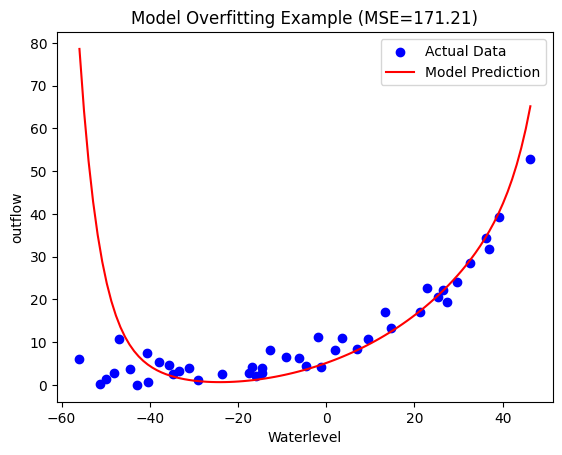

In [38]:
# Again with alpha=10
df.sort_values(by='waterlevel')

# Split the dataset into a 20% train and 80% test split
X = df[['waterlevel']]
y = df['outflow']  # Replace 'target_variable' with the name of your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

poly_features = PolynomialFeatures(degree=14)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

model = Ridge(alpha=0.10)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

plt.scatter(X_test, y_test, label='Actual Data', color='blue')

x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
x_range_scaled = scaler.transform(x_range_poly)
y_pred_range = model.predict(x_range_scaled)
plt.plot(x_range, y_pred_range, label='Model Prediction', color='red')

plt.xlabel('Waterlevel')
plt.ylabel('outflow')
plt.legend()
plt.title(f'Model Overfitting Example (MSE={mse:.2f})')
plt.show()

You should notice that down the middle part this still works reasonably well, but extrapolation is an even bigger nono.

In [ ]:
halt_notebook()